<a href="https://colab.research.google.com/github/Said20038/DeepLearning/blob/main/TP_Impl%C3%A9mentation_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Introduction

Convolutional Neural Networks (CNNs) have become a cornerstone of modern computer vision, enabling machines to automatically learn and extract meaningful features from raw image data. Unlike traditional image processing methods, CNNs combine convolutional layers for feature extraction, pooling layers for dimensionality reduction, and fully-connected layers for classification into an end-to-end learning framework.

The purpose of this practical work is to explore the fundamentals and applications of CNNs using both **Keras** and **PyTorch**. We begin by building and training a simple CNN on the **MNIST** dataset of handwritten digits, focusing on understanding the role of each layer and key hyperparameters. We then move towards more advanced architectures, such as **VGG-16** and **ResNet**, applying **transfer learning** techniques to leverage pre-trained models for the same classification task.

Through these experiments, the TP aims to provide hands-on experience with CNN implementation, model training and evaluation, and the adaptation of state-of-the-art architectures to new datasets. This not only strengthens understanding of deep learning concepts but also demonstrates the practical advantages of transfer learning in achieving high performance with minimal training effort.

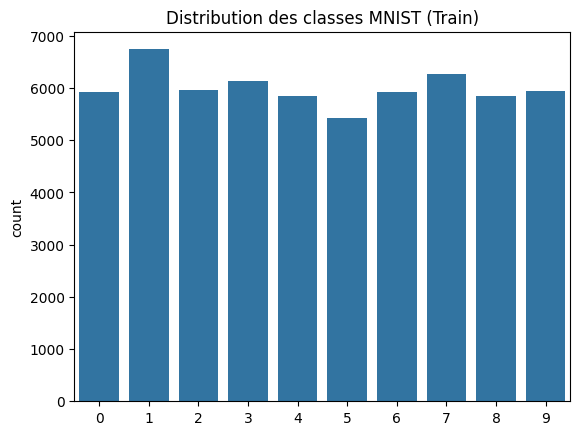

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 9s - 21ms/step - accuracy: 0.9382 - loss: 0.2037 - val_accuracy: 0.9865 - val_loss: 0.0445
Epoch 2/5
422/422 - 3s - 7ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 3/5
422/422 - 5s - 12ms/step - accuracy: 0.9903 - loss: 0.0325 - val_accuracy: 0.9907 - val_loss: 0.0317
Epoch 4/5
422/422 - 5s - 12ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9925 - val_loss: 0.0282
Epoch 5/5
422/422 - 5s - 12ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9915 - val_loss: 0.0326
[Keras CNN] Test Accuracy: 99.18%


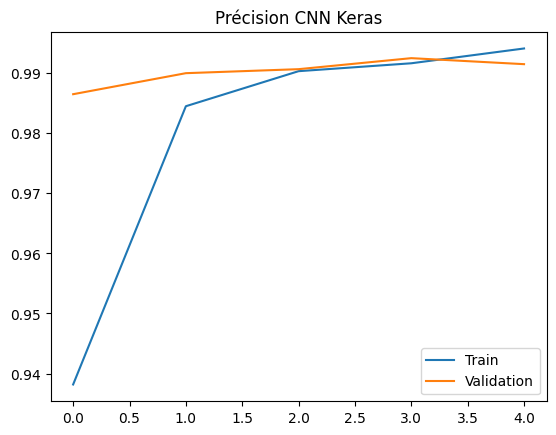

In [ ]:
# =========================================================
# 1️⃣ CNN avec Keras - Architecture
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Chargement MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prétraitement
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Distribution des classes
sns.countplot(x=y_train)
plt.title("Distribution des classes MNIST (Train)")
plt.show()

# Modèle CNN Keras corrigé
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation et entraînement
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Évaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"[Keras CNN] Test Accuracy: {test_acc*100:.2f}%")

# Courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Précision CNN Keras")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step

Rapport de classification (CNN Keras):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



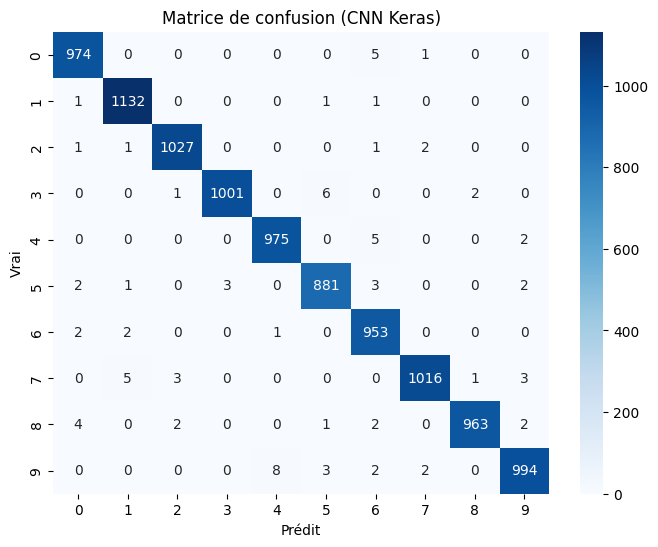

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Rapport de classification
print("\nRapport de classification (CNN Keras):")
print(classification_report(y_true, y_pred_classes))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion (CNN Keras)")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()


In [ ]:
# ============================
# Partie 1 : Imports & Config
# ============================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# ==========================================
# Partie 2 : Fonctions utilitaires
# ==========================================

def train_model(model, optimizer, criterion, train_loader, test_loader, epochs=3, name="Model"):
    train_losses, val_accuracies = [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validation
        acc = eval_model(model, test_loader)
        val_accuracies.append(acc)

        print(f"[{name}] Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Acc: {acc:.2f}%")

    return train_losses, val_accuracies


def eval_model(model, test_loader, plot_cm=False, name="Model"):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = 100 * correct / total

    if plot_cm:
        cm = confusion_matrix(all_labels, all_preds)
        print(f"\nRapport de classification ({name}):")
        print(classification_report(all_labels, all_preds))

        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Matrice de confusion ({name})")
        plt.xlabel("Prédit")
        plt.ylabel("Vrai")
        plt.show()

    return acc


def plot_curves(train_losses, val_accuracies, name="Model"):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(train_losses, label="Training Loss")
    plt.title(f"Courbe de perte ({name})")
    plt.xlabel("Époque")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(val_accuracies, label="Test Accuracy")
    plt.title(f"Courbe de précision ({name})")
    plt.xlabel("Époque")
    plt.ylabel("Accuracy (%)")
    plt.legend()

    plt.show()


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.15MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


[CNN PyTorch] Epoch 1/5, Loss: 0.1431, Test Acc: 98.86%
[CNN PyTorch] Epoch 2/5, Loss: 0.0411, Test Acc: 98.85%
[CNN PyTorch] Epoch 3/5, Loss: 0.0278, Test Acc: 99.19%
[CNN PyTorch] Epoch 4/5, Loss: 0.0218, Test Acc: 99.37%
[CNN PyTorch] Epoch 5/5, Loss: 0.0168, Test Acc: 99.18%


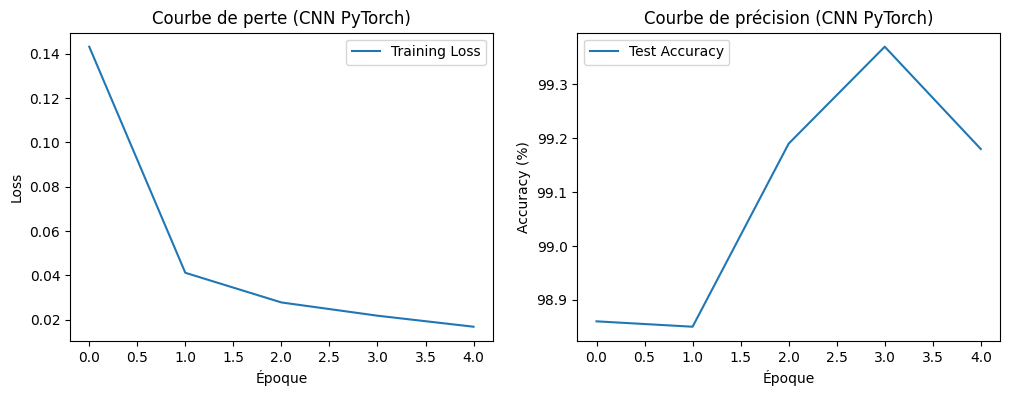


Rapport de classification (CNN PyTorch):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



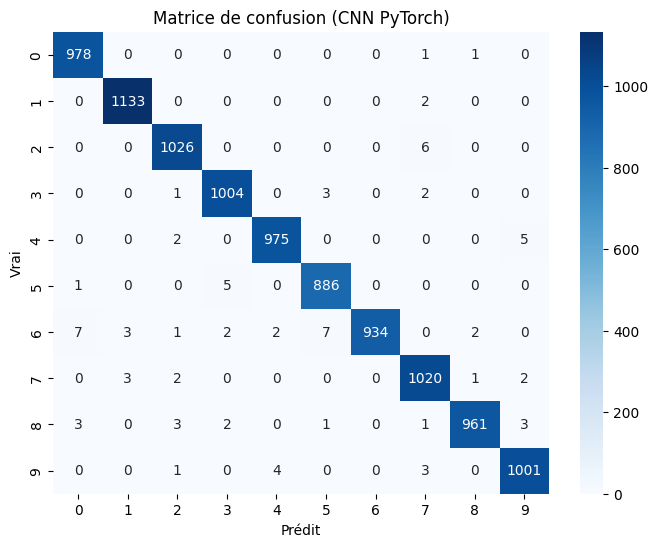

99.18

In [ ]:
# ======================================================
# Partie 3 : CNN PyTorch classique sur MNIST (28x28)
# ======================================================

# Prétraitement
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*3*3, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 64*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Entraînement
train_losses_cnn, val_acc_cnn = train_model(model_cnn, optimizer, criterion, train_loader, test_loader, epochs=5, name="CNN PyTorch")

# Visualisation
plot_curves(train_losses_cnn, val_acc_cnn, name="CNN PyTorch")
eval_model(model_cnn, test_loader, plot_cm=True, name="CNN PyTorch")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 192MB/s]


[VGG16 TL] Epoch 1/3, Loss: 0.3570, Test Acc: 97.87%
[VGG16 TL] Epoch 2/3, Loss: 0.3020, Test Acc: 98.65%
[VGG16 TL] Epoch 3/3, Loss: 0.2399, Test Acc: 98.90%


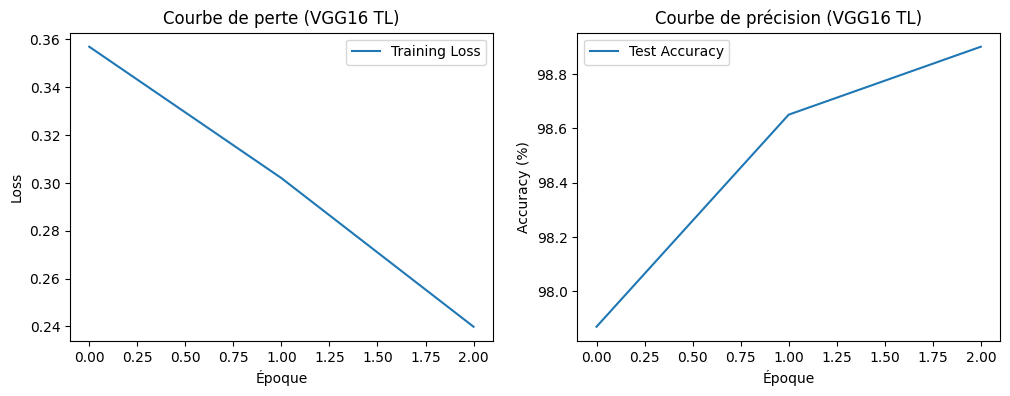


Rapport de classification (VGG16 TL):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



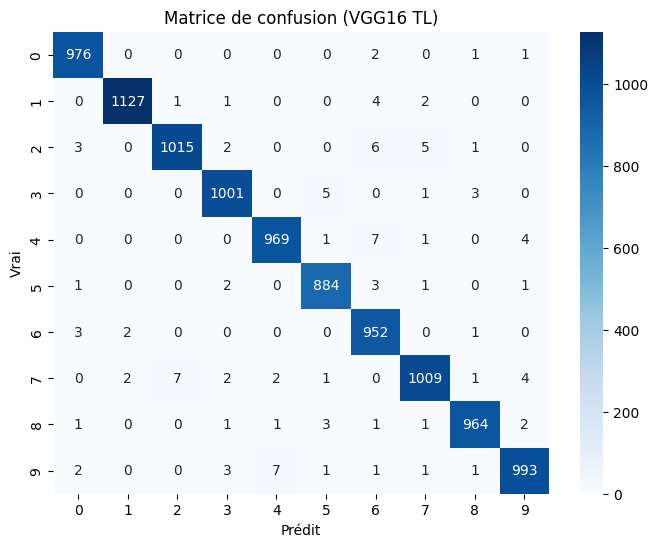

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 214MB/s]


[ResNet18 TL] Epoch 1/3, Loss: 0.3320, Test Acc: 95.71%
[ResNet18 TL] Epoch 2/3, Loss: 0.1645, Test Acc: 96.29%
[ResNet18 TL] Epoch 3/3, Loss: 0.1420, Test Acc: 96.59%


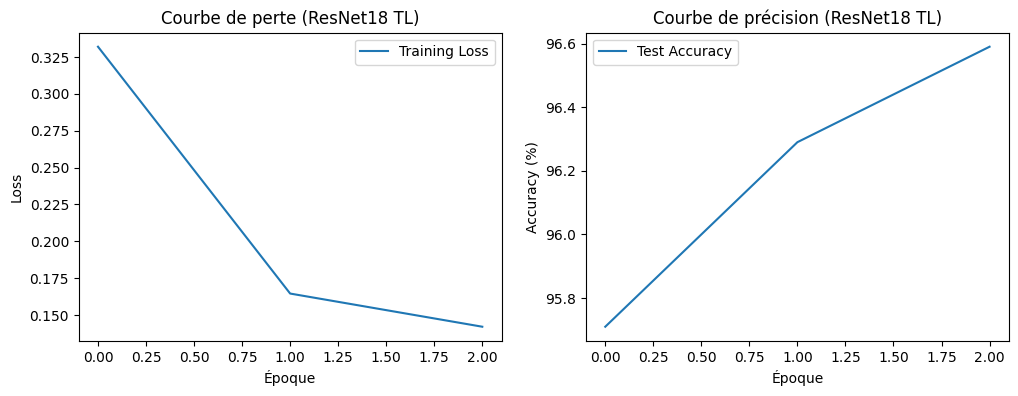


Rapport de classification (ResNet18 TL):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.93      0.96      0.95       892
           6       0.95      0.98      0.96       958
           7       0.98      0.94      0.96      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



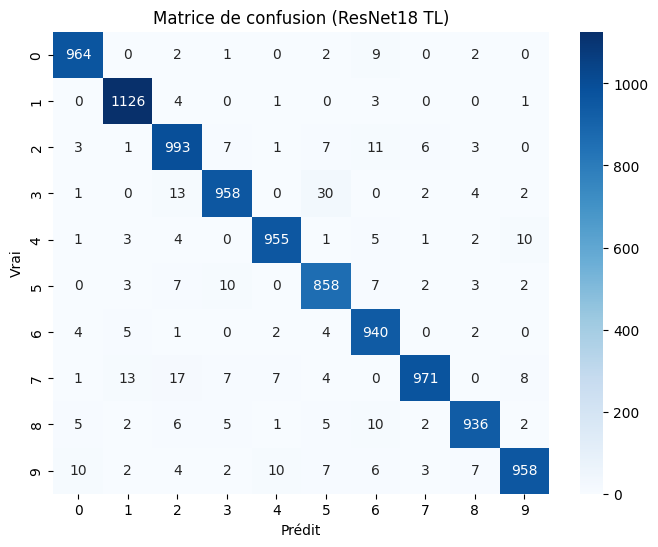

96.59

In [ ]:
# ======================================================
# Partie 4 : Transfer Learning VGG16 et ResNet18
# ======================================================
from torchvision import models

# Prétraitement (MNIST -> 224x224 RGB)
transform_tl = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

train_dataset_tl = datasets.MNIST(root='./data', train=True, download=True, transform=transform_tl)
test_dataset_tl = datasets.MNIST(root='./data', train=False, transform=transform_tl)

train_loader_tl = DataLoader(train_dataset_tl, batch_size=32, shuffle=True)
test_loader_tl = DataLoader(test_dataset_tl, batch_size=32, shuffle=False)

# ----- VGG16 -----
vgg16 = models.vgg16(pretrained=True)
for param in vgg16.features.parameters():
    param.requires_grad = False
vgg16.classifier[6] = nn.Linear(4096, 10)
vgg16 = vgg16.to(device)

optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001)
train_losses_vgg, val_acc_vgg = train_model(vgg16, optimizer, criterion, train_loader_tl, test_loader_tl, epochs=3, name="VGG16 TL")
plot_curves(train_losses_vgg, val_acc_vgg, name="VGG16 TL")
eval_model(vgg16, test_loader_tl, plot_cm=True, name="VGG16 TL")

# ----- ResNet18 -----
resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False
resnet18.fc = nn.Linear(resnet18.fc.in_features, 10)
resnet18 = resnet18.to(device)

optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)
train_losses_resnet, val_acc_resnet = train_model(resnet18, optimizer, criterion, train_loader_tl, test_loader_tl, epochs=3, name="ResNet18 TL")
plot_curves(train_losses_resnet, val_acc_resnet, name="ResNet18 TL")
eval_model(resnet18, test_loader_tl, plot_cm=True, name="ResNet18 TL")


In [ ]:
# ======================================================
# Partie 5 : Résumé comparatif des performances
# ======================================================

print("\n===== Résumé des performances =====")
print(f"CNN PyTorch : {val_acc_cnn[-1]:.2f}%")
print(f"VGG16 (TL)  : {val_acc_vgg[-1]:.2f}%")
print(f"ResNet18 TL : {val_acc_resnet[-1]:.2f}%")



===== Résumé des performances =====
CNN PyTorch : 99.18%
VGG16 (TL)  : 98.90%
ResNet18 TL : 96.59%
